In [1]:
%matplotlib inline

In [2]:
import os
import netCDF4
import numpy as np
from geophys_utils import NetCDFGridUtils
from geophys_utils import get_netcdf_edge_points, points2convex_hull
import matplotlib.pyplot as plt
from shapely.geometry import shape, Polygon, MultiPolygon, asMultiPoint

In [3]:
def convert_coords_to_pixels(points, netcdf_grid_utils):
    pixel_indices = np.array(points)
    pixel_indices = (pixel_indices - np.array([netcdf_grid_utils.bounds[0], netcdf_grid_utils.bounds[1]]))
    pixel_indices = (pixel_indices / 
              (np.array(netcdf_grid_utils.pixel_size))).astype(np.int64)
    pixel_indices[:,1] = netcdf_grid_utils.pixel_count[1] - pixel_indices[:,1]
    return pixel_indices

In [4]:
# Setup proxy as required
GA_STAFF_WIFI = False

if GA_STAFF_WIFI:
    os.environ['http_proxy'] = 'http://proxy.inno.lan:3128'
    os.environ['https_proxy'] = 'http://proxy.inno.lan:3128'    

In [5]:
# Open netCDF4 Dataset
netcdf_path = "/g/data/rr2/national_geophysical_compilations/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc"
if not os.path.isfile(netcdf_path):
    netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/rr2/national_geophysical_compilations/IR_gravity_anomaly_Australia_V1/IR_gravity_anomaly_Australia_V1.nc"
netcdf_path = 'C:\\Users\\alex\\Documents\\GADDS2\\Gippsland_Basin_Gravity_P201430_SCBA267GUVD.nc'
#netcdf_path = "/g/data2/uc0/rr2_dev/axi547/IR_gravity_anomaly_Australia_V1_inverted.nc"
#if not os.path.isfile(netcdf_path):
#netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/axi547/IR_gravity_anomaly_Australia_V1_inverted.nc"

#netcdf_path = "/g/data1/rr2/National_Coverages/magmap_v6_2015/magmap_v6_2015.nc"
#if not os.path.isfile(netcdf_path):
#    netcdf_path = "http://dapds00.nci.org.au/thredds/dodsC/rr2/National_Coverages/magmap_v6_2015/magmap_v6_2015.nc"
#    netcdf_path = "http://dapds03.nci.org.au/thredds/dodsC/rr2/National_Coverages/magmap_v6_2015/magmap_v6_2015.nc"
print(netcdf_path)
netcdf_dataset = netCDF4.Dataset(netcdf_path, 'r')

max_bytes = 500000000
#max_bytes = 8000000000

netcdf_grid_utils = NetCDFGridUtils(netcdf_dataset)
#netcdf_grid_utils.__dict__

C:\Users\alex\Documents\GADDS2\Gippsland_Basin_Gravity_P201430_SCBA267GUVD.nc


In [6]:
# Find edge points
edge_points = get_netcdf_edge_points(netcdf_dataset, max_bytes=max_bytes)
print(edge_points.shape)

(4188, 2)


In [7]:
# Compute convex hull
# Note that we would normally use netcdf2convex_hull to go straight to the convex hull, but we want to plot the edge points
avg_pixel_size = (netcdf_grid_utils.pixel_size[0] + netcdf_grid_utils.pixel_size[1]) / 2.0
convex_hull = np.array(points2convex_hull(edge_points, avg_pixel_size, avg_pixel_size))
print(convex_hull.shape)

(13, 2)


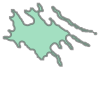

In [8]:
# Compute concave hull
concave_hull = netcdf_grid_utils.get_concave_hull()
concave_hull

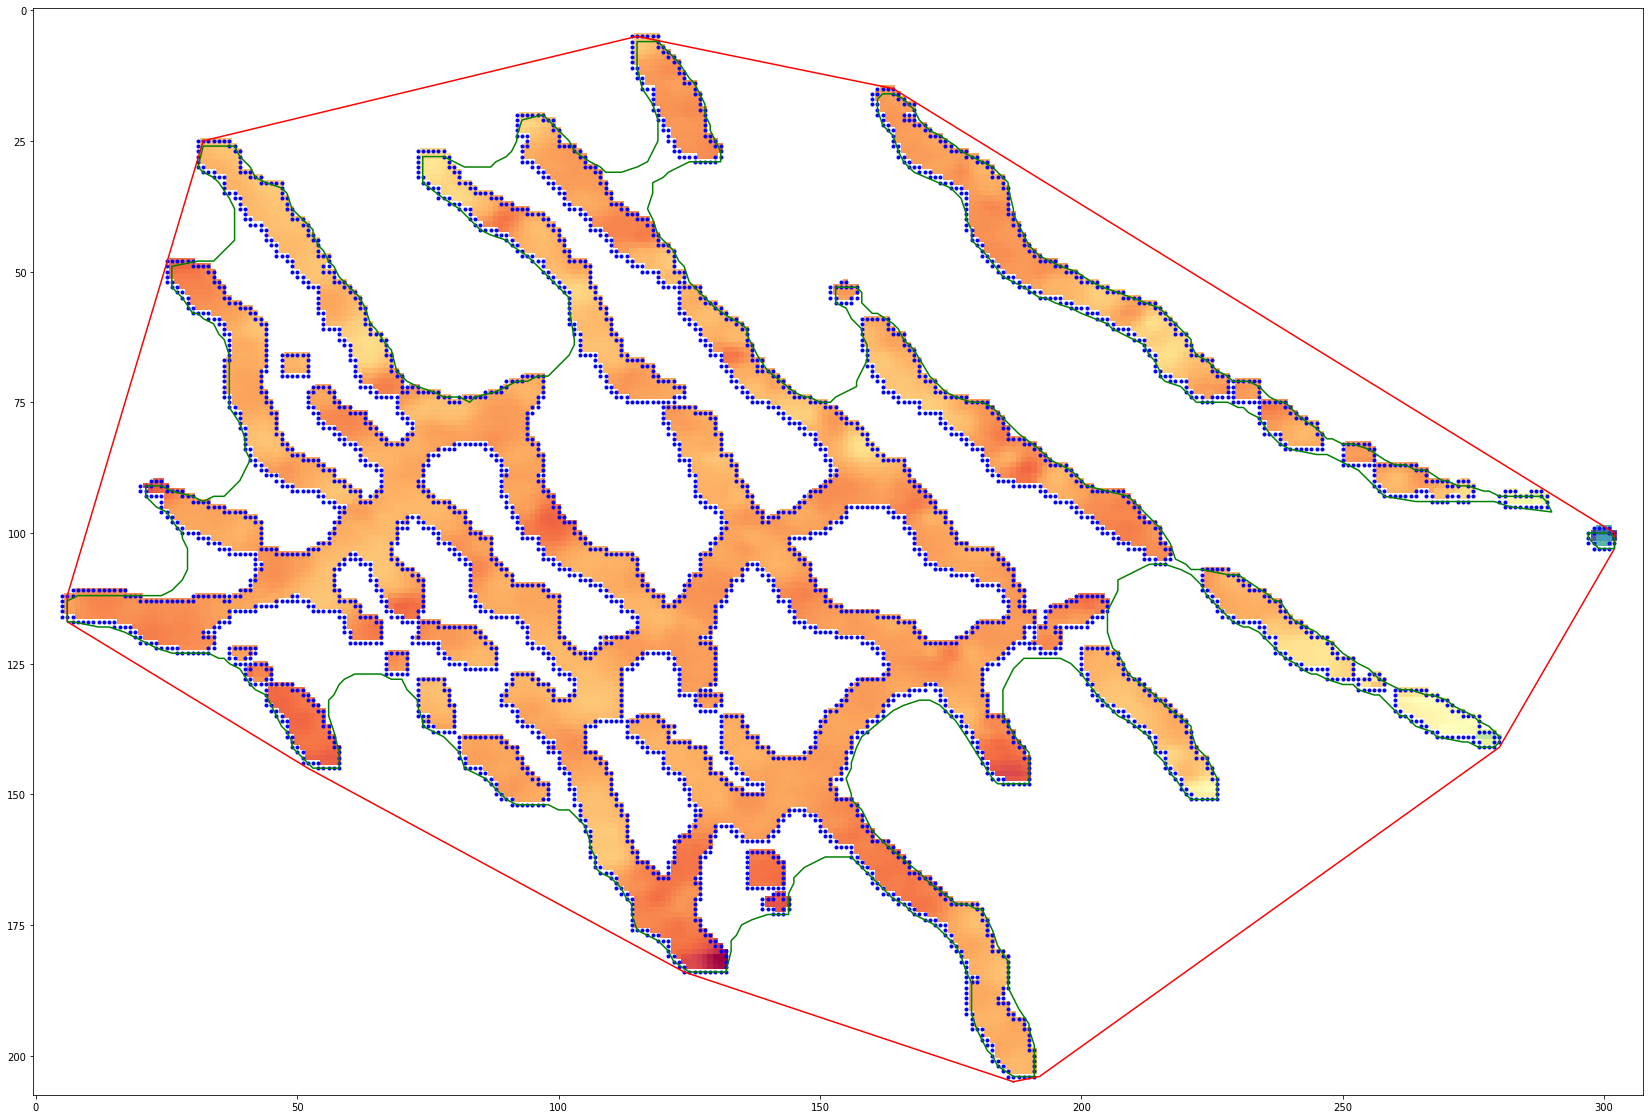

In [9]:
# Plot data points
plt.figure(figsize=(30,20))    
plt.imshow(netcdf_grid_utils.data_variable[:], cmap='Spectral_r')

pixel_indices = convert_coords_to_pixels(edge_points, netcdf_grid_utils)
plt.plot(pixel_indices[:,0], pixel_indices[:,1], 'b.')
pixel_indices = convert_coords_to_pixels(convex_hull, netcdf_grid_utils)
plt.plot(pixel_indices[:,0], pixel_indices[:,1], 'r-')

if type(concave_hull) == MultiPolygon:
    for polygon in concave_hull:
        pixel_indices = convert_coords_to_pixels(polygon.exterior.coords, netcdf_grid_utils)
        plt.plot(pixel_indices[:,0], pixel_indices[:,1], 'g-')
elif type(concave_hull) == Polygon:
    pixel_indices = convert_coords_to_pixels(concave_hull.exterior.coords, netcdf_grid_utils)
    plt.plot(pixel_indices[:,0], pixel_indices[:,1], 'g-')
else:
    raise ValueError('Unexpected type of geometry: {}'.format(type(offset_geometry)))
